In [1]:

import warnings
import logging
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [2]:
train = pd.read_csv('../input/train.csv',nrows=100000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

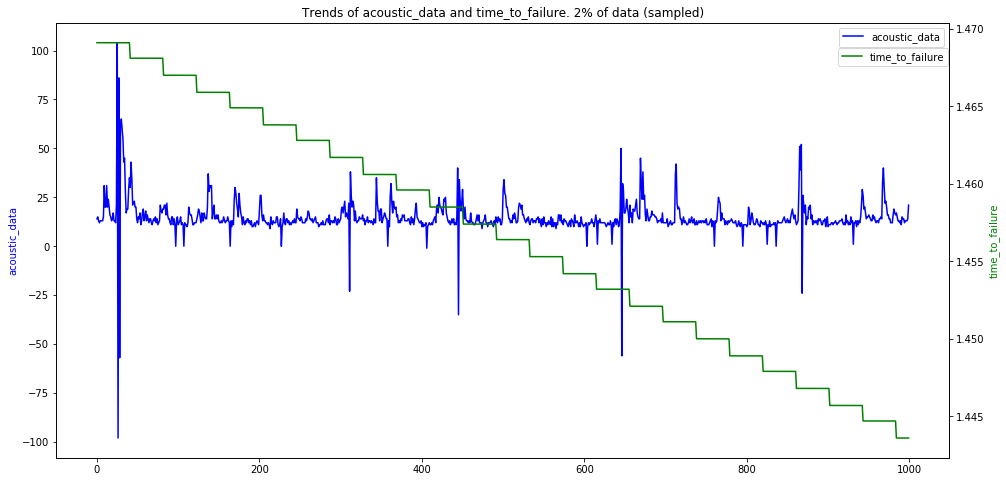

In [3]:
train_acoustic_data_small = train['acoustic_data'].values[::100]
import numpy as np
mean = np.mean(train['acoustic_data'])
for i in range(1000):
    tmp = train['acoustic_data'].values[i*100:(i+1)*100 -1]
    mmax = np.max(tmp)
    mmin = np.min(tmp)
    if np.absolute(mmax-mean) > np.absolute(mmin+mean):
        train_acoustic_data_small[i] = mmax
    else:
        train_acoustic_data_small[i] = mmin
train_acoustic_data_small = train['acoustic_data'].values[::100]
train_time_to_failure_small = train['time_to_failure'].values[::100]
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

# del train_acoustic_data_small
# del train_time_to_failure_small

In [4]:
X = np.column_stack([train_acoustic_data_small])
num_components = 10
model = hmm.GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)
model.fit(X)



GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=10, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [5]:

hidden_states = model.predict(X)
# predict_value = []
# prev = list(hidden_states)
# # predict_value.append(model._generate_sample_from_state(hidden_states[-1]))
# mem = 300
# prev_len = 300
# for i in range(1000):
#     if i < prev_len:
#         predict_value.append(X[i])
#     else:
#         if i < mem + prev_len:
#             seq = prev[(-mem+i):prev_len] + predict_value[prev_len:]
#         else :
#             seq = predict_value[-mem:]
#         predict_value.append(model._generate_sample_from_state(model.predict(np.asarray(seq).reshape(-1, 1))[-1]))
# #         print(len(seq))
# predict_value = []

# for i in range(1000):
#     if i < 300:
#         predict_value.append(hidden_states[i])
#     else:
#         predict_value.append(model._generate_sample_from_state(predict_value[-1]))
# z = np.array(predict_value)
# hidden_states = model.predict(X)
fit_value = []
for x in hidden_states:
    fit_value.append(model._generate_sample_from_state(x))
y = np.array(fit_value)



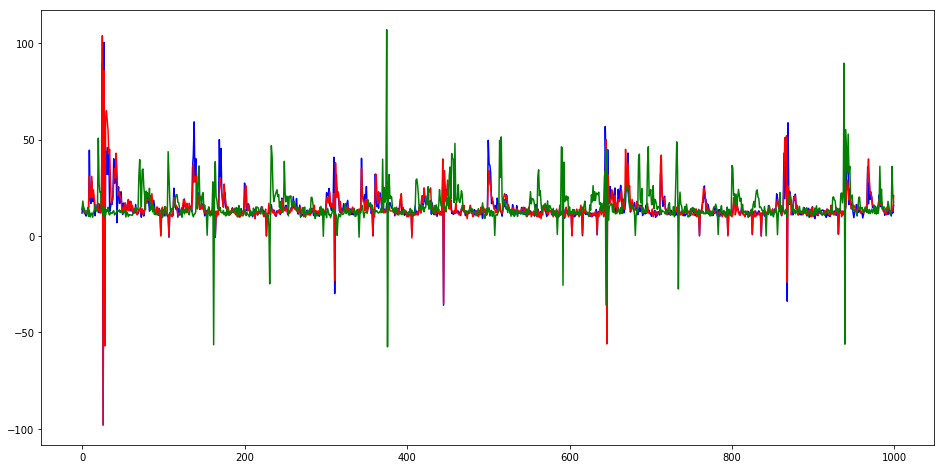

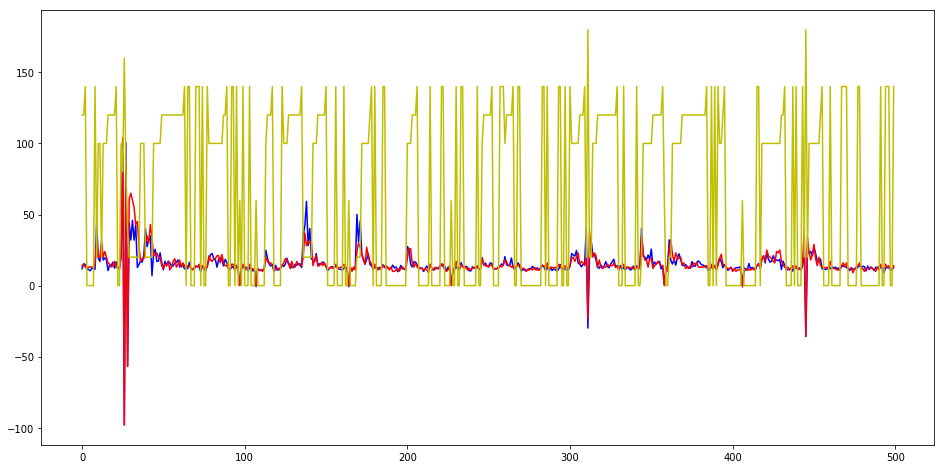

In [7]:
new_seq,new_state = model.sample(1000)
plt.figure(figsize=(16, 8))
plt.plot(y, color='b')
plt.plot(X, color='r')
plt.plot(new_seq, color='g')
plt.figure(figsize=(16, 8))
n = 500
plt.plot(y[:n], color='b')
plt.plot(X[:n], color='r')
plt.plot(hidden_states[:n] * 20, color='y')

In [ ]:
Y = np.column_stack([_test_data['acoustic_data']])
future_states = model.predict(Y)

In [ ]:
predict_value = []
for x in future_states:
    predict_value.append(model._generate_sample_from_state(x))
predict_value

In [ ]:
days = np.array(test_data['time_to_failure'])[:100]
actual_close_prices = _test_data['acoustic_data']

fig = plt.figure(figsize=(10,4))

axes = fig.add_subplot(111)
axes.plot(days, actual_close_prices[:100], 'bo-', label="actual")
axes.plot(days, predict_value[:100], 'r+-', label="predicted")
axes.set_title('RESULT')

fig.autofmt_xdate()

plt.legend()
plt.show()